In [ ]:
import cv2
import pandas as pd
import os 
import numpy as np
import random 
from random import shuffle 
from tqdm import tqdm
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import np_utils
from tensorflow.keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
INPUT_SCAN_FOLDER='/content/drive/My Drive/NEU surface defect database' # path where the dataset is stored

slices=[]
for dirName, subdirList, fileList in os.walk(INPUT_SCAN_FOLDER):
        for filename in fileList:
            if ".bmp" in filename.lower():
                slices.append(cv2.imread(os.path.join(dirName, filename),0))

final=[]
for i in range(len(slices)):
    features = np.array([slices[i]])
    final.append(features)

slices2=[]
for i in range(len(slices)):
    pd2 = (pd.melt(pd.DataFrame(np.array(final)[i,0])))
    pd2 = (pd2.drop(["variable"], axis=1).values)
    slices2.append(pd2.T)

In [ ]:
(np.array(slices[1])).shape

(200, 200)

In [ ]:
pd_final = pd.DataFrame(np.array(slices2)[:,0,:])
arr_final = np.array(pd_final)

final_2 = []

for i in range(1800):
    label=(i/300)
    features_final = np.concatenate([arr_final[i],[np.floor(label)]])
    final_2.append(features_final)
    
final_3 = pd.DataFrame(np.array(final_2))
final_3 = (final_3.rename(columns={ 40000 : 'Label'}))
final_3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,39961,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999,Label
0,205.0,196.0,164.0,160.0,163.0,172.0,194.0,199.0,148.0,151.0,154.0,179.0,164.0,138.0,171.0,157.0,155.0,142.0,129.0,141.0,135.0,162.0,163.0,176.0,192.0,174.0,183.0,181.0,172.0,176.0,199.0,197.0,180.0,198.0,180.0,157.0,170.0,221.0,183.0,167.0,...,148.0,120.0,134.0,144.0,134.0,113.0,119.0,126.0,117.0,131.0,133.0,131.0,128.0,120.0,109.0,111.0,111.0,127.0,131.0,126.0,135.0,139.0,126.0,132.0,119.0,126.0,118.0,130.0,138.0,163.0,143.0,136.0,130.0,155.0,149.0,126.0,123.0,134.0,133.0,0.0
1,117.0,123.0,99.0,115.0,113.0,109.0,126.0,113.0,100.0,99.0,104.0,108.0,110.0,118.0,127.0,104.0,103.0,97.0,88.0,77.0,69.0,88.0,102.0,124.0,109.0,117.0,135.0,136.0,122.0,104.0,110.0,110.0,106.0,126.0,123.0,110.0,118.0,116.0,146.0,129.0,...,196.0,199.0,208.0,197.0,227.0,241.0,224.0,231.0,211.0,222.0,204.0,197.0,204.0,176.0,179.0,217.0,197.0,190.0,220.0,255.0,197.0,173.0,168.0,136.0,159.0,170.0,175.0,170.0,166.0,184.0,195.0,197.0,207.0,188.0,248.0,218.0,197.0,183.0,157.0,0.0
2,73.0,85.0,82.0,73.0,69.0,72.0,70.0,73.0,73.0,74.0,71.0,65.0,66.0,86.0,80.0,77.0,73.0,69.0,61.0,68.0,71.0,68.0,78.0,66.0,62.0,66.0,68.0,71.0,71.0,68.0,64.0,68.0,76.0,84.0,72.0,64.0,74.0,62.0,65.0,69.0,...,103.0,106.0,123.0,150.0,159.0,158.0,138.0,138.0,157.0,158.0,156.0,168.0,156.0,132.0,124.0,129.0,148.0,139.0,124.0,116.0,119.0,151.0,154.0,142.0,158.0,148.0,150.0,141.0,126.0,126.0,121.0,106.0,118.0,112.0,121.0,135.0,136.0,119.0,113.0,0.0
3,78.0,78.0,103.0,78.0,94.0,94.0,67.0,66.0,57.0,70.0,77.0,82.0,78.0,70.0,50.0,52.0,59.0,71.0,69.0,67.0,60.0,55.0,62.0,71.0,63.0,58.0,65.0,59.0,58.0,69.0,66.0,73.0,64.0,52.0,51.0,68.0,68.0,62.0,63.0,51.0,...,192.0,182.0,182.0,169.0,189.0,182.0,169.0,182.0,189.0,179.0,183.0,179.0,189.0,164.0,176.0,167.0,170.0,163.0,165.0,177.0,185.0,174.0,211.0,186.0,179.0,218.0,212.0,190.0,189.0,194.0,185.0,162.0,153.0,155.0,160.0,174.0,188.0,189.0,165.0,0.0
4,139.0,109.0,128.0,149.0,150.0,165.0,174.0,167.0,175.0,151.0,138.0,147.0,143.0,127.0,104.0,115.0,138.0,152.0,170.0,152.0,153.0,171.0,175.0,159.0,151.0,161.0,151.0,150.0,146.0,148.0,195.0,203.0,203.0,171.0,174.0,167.0,149.0,134.0,115.0,134.0,...,209.0,220.0,235.0,210.0,210.0,173.0,159.0,160.0,151.0,140.0,167.0,162.0,174.0,169.0,193.0,200.0,189.0,191.0,208.0,204.0,170.0,147.0,158.0,148.0,146.0,151.0,151.0,155.0,177.0,208.0,228.0,221.0,184.0,196.0,200.0,216.0,202.0,222.0,230.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,168.0,155.0,180.0,199.0,169.0,138.0,137.0,125.0,130.0,118.0,99.0,96.0,111.0,121.0,119.0,159.0,140.0,137.0,153.0,131.0,141.0,151.0,134.0,169.0,162.0,197.0,205.0,200.0,189.0,195.0,190.0,173.0,151.0,130.0,138.0,127.0,151.0,158.0,179.0,170.0,...,185.0,161.0,166.0,163.0,166.0,174.0,173.0,200.0,176.0,184.0,172.0,159.0,165.0,153.0,128.0,135.0,141.0,128.0,135.0,132.0,127.0,133.0,163.0,162.0,153.0,133.0,126.0,135.0,156.0,149.0,146.0,130.0,126.0,122.0,146.0,143.0,136.0,123.0,138.0,5.0
1796,137.0,121.0,138.0,140.0,127.0,114.0,108.0,96.0,127.0,140.0,137.0,123.0,118.0,119.0,117.0,104.0,122.0,128.0,149.0,145.0,112.0,111.0,106.0,108.0,101.0,119.0,120.0,128.0,101.0,91.0,78.0,88.0,112.0,110.0,121.0,147.0,149.0,122.0,116.0,111.0,...,195.0,186.0,206.0,219.0,208.0,194.0,180.0,170.0,161.0,136.0,168.0,154.0,170.0,175.0,205.0,218.0,210.0,210.0,208.0,184.0,186.0,198.0,215.0,219.0,176.0,165.0,176.0,164.0,163.0,158.0,202.0,200.0,191.0,182.0,172.0,175.0,177.0,161.0,155.0,5.0
1797,155.0,131.

In [ ]:
conditions = [
    (final_3['Label'] == 0),
    (final_3['Label'] == 1),
    (final_3['Label'] == 2),
    (final_3['Label'] == 3),
    (final_3['Label'] == 4),
    (final_3['Label'] == 5)]
choices = ['Quebra', 'Inclusão', 'Manchas', 'Corrosão Superficial por Pite', 'Carepa Incrustada', 'Marcas Superficiais']
final_3['Defeitos'] = np.select(conditions, choices)

final_3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999,Label,Defeitos
0,205.0,196.0,164.0,160.0,163.0,172.0,194.0,199.0,148.0,151.0,154.0,179.0,164.0,138.0,171.0,157.0,155.0,142.0,129.0,141.0,135.0,162.0,163.0,176.0,192.0,174.0,183.0,181.0,172.0,176.0,199.0,197.0,180.0,198.0,180.0,157.0,170.0,221.0,183.0,167.0,...,120.0,134.0,144.0,134.0,113.0,119.0,126.0,117.0,131.0,133.0,131.0,128.0,120.0,109.0,111.0,111.0,127.0,131.0,126.0,135.0,139.0,126.0,132.0,119.0,126.0,118.0,130.0,138.0,163.0,143.0,136.0,130.0,155.0,149.0,126.0,123.0,134.0,133.0,0.0,Quebra
1,117.0,123.0,99.0,115.0,113.0,109.0,126.0,113.0,100.0,99.0,104.0,108.0,110.0,118.0,127.0,104.0,103.0,97.0,88.0,77.0,69.0,88.0,102.0,124.0,109.0,117.0,135.0,136.0,122.0,104.0,110.0,110.0,106.0,126.0,123.0,110.0,118.0,116.0,146.0,129.0,...,199.0,208.0,197.0,227.0,241.0,224.0,231.0,211.0,222.0,204.0,197.0,204.0,176.0,179.0,217.0,197.0,190.0,220.0,255.0,197.0,173.0,168.0,136.0,159.0,170.0,175.0,170.0,166.0,184.0,195.0,197.0,207.0,188.0,248.0,218.0,197.0,183.0,157.0,0.0,Quebra
2,73.0,85.0,82.0,73.0,69.0,72.0,70.0,73.0,73.0,74.0,71.0,65.0,66.0,86.0,80.0,77.0,73.0,69.0,61.0,68.0,71.0,68.0,78.0,66.0,62.0,66.0,68.0,71.0,71.0,68.0,64.0,68.0,76.0,84.0,72.0,64.0,74.0,62.0,65.0,69.0,...,106.0,123.0,150.0,159.0,158.0,138.0,138.0,157.0,158.0,156.0,168.0,156.0,132.0,124.0,129.0,148.0,139.0,124.0,116.0,119.0,151.0,154.0,142.0,158.0,148.0,150.0,141.0,126.0,126.0,121.0,106.0,118.0,112.0,121.0,135.0,136.0,119.0,113.0,0.0,Quebra
3,78.0,78.0,103.0,78.0,94.0,94.0,67.0,66.0,57.0,70.0,77.0,82.0,78.0,70.0,50.0,52.0,59.0,71.0,69.0,67.0,60.0,55.0,62.0,71.0,63.0,58.0,65.0,59.0,58.0,69.0,66.0,73.0,64.0,52.0,51.0,68.0,68.0,62.0,63.0,51.0,...,182.0,182.0,169.0,189.0,182.0,169.0,182.0,189.0,179.0,183.0,179.0,189.0,164.0,176.0,167.0,170.0,163.0,165.0,177.0,185.0,174.0,211.0,186.0,179.0,218.0,212.0,190.0,189.0,194.0,185.0,162.0,153.0,155.0,160.0,174.0,188.0,189.0,165.0,0.0,Quebra
4,139.0,109.0,128.0,149.0,150.0,165.0,174.0,167.0,175.0,151.0,138.0,147.0,143.0,127.0,104.0,115.0,138.0,152.0,170.0,152.0,153.0,171.0,175.0,159.0,151.0,161.0,151.0,150.0,146.0,148.0,195.0,203.0,203.0,171.0,174.0,167.0,149.0,134.0,115.0,134.0,...,220.0,235.0,210.0,210.0,173.0,159.0,160.0,151.0,140.0,167.0,162.0,174.0,169.0,193.0,200.0,189.0,191.0,208.0,204.0,170.0,147.0,158.0,148.0,146.0,151.0,151.0,155.0,177.0,208.0,228.0,221.0,184.0,196.0,200.0,216.0,202.0,222.0,230.0,0.0,Quebra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,168.0,155.0,180.0,199.0,169.0,138.0,137.0,125.0,130.0,118.0,99.0,96.0,111.0,121.0,119.0,159.0,140.0,137.0,153.0,131.0,141.0,151.0,134.0,169.0,162.0,197.0,205.0,200.0,189.0,195.0,190.0,173.0,151.0,130.0,138.0,127.0,151.0,158.0,179.0,170.0,...,161.0,166.0,163.0,166.0,174.0,173.0,200.0,176.0,184.0,172.0,159.0,165.0,153.0,128.0,135.0,141.0,128.0,135.0,132.0,127.0,133.0,163.0,162.0,153.0,133.0,126.0,135.0,156.0,149.0,146.0,130.0,126.0,122.0,146.0,143.0,136.0,123.0,138.0,5.0,Marcas Superficiais
1796,137.0,121.0,138.0,140.0,127.0,114.0,108.0,96.0,127.0,140.0,137.0,123.0,118.0,119.0,117.0,104.0,122.0,128.0,149.0,145.0,112.0,111.0,106.0,108.0,101.0,119.0,120.0,128.0,101.0,91.0,78.0,88.0,112.0,110.0,121.0,147.0,149.0,122.0,116.0,111.0,...,186.0,206.0,219.0,208.0,194.0,180.0,170.0,161.0,136.0,168.0,154.0,170.0,175.0,205.0,218.0,210.0,210.0,208.0,184.0,186.0,198.0,215.0,219.0,176.0,165.0,176.0,164.0,163.0,158.0,202.0,200.0,191.0,182.0,172.0,175.0,177.0,161.0,155.0,5.0

In [ ]:
X = final_3.iloc[:,0:40000]
Y = final_3.iloc[:,-2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)

In [ ]:
x_train = np.array(x_train).reshape((x_train.shape[0], 200, 200, 1))
x_test = np.array(x_test.values).reshape((x_test.shape[0], 200, 200, 1))

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

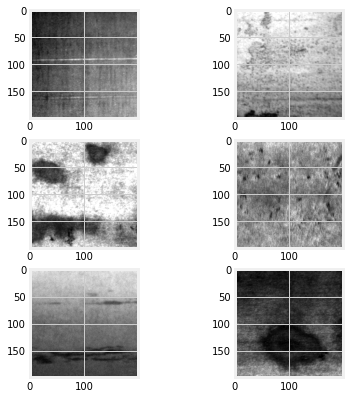

In [ ]:
#plotando algumas imagens aleatórias

for i in range(0, 6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    plt.subplot(3,2,i+1)
    plt.imshow(img.reshape(200, 200), cmap=plt.get_cmap('gray'))
plt.subplots_adjust(top=1.4)
plt.show()

In [ ]:
#escalonando x_train e x_test

x_train = x_train / 255
x_test = x_test / 255

In [ ]:
import imageio
import imgaug as ia
from imgaug import augmenters as iaa

# Vamos criar uma pipeline para Augmentation. Aqui, vamos aplicar diversas operações nas imagens para aumentar a riqueza do nosso BD
aug_pipeline = iaa.Sequential([
                               
    iaa.Sometimes(0.1, iaa.AdditiveGaussianNoise(scale=0.2*255)), #aplicar Gaussian Noise a 10% das imagens.
    iaa.Sometimes(0.2, iaa.GammaContrast((0.5, 2.0))), # Modificar o contraste Gamma das imagens em um intervalo [0.5, 2.0]. Aplicável a 20% das imagens.
    iaa.Sometimes(0.1, iaa.Multiply((0.5, 1.5), per_channel=0.5)), # Alterar o brilho das imagens (50-150% do valor original). Aplicável em 10% das imagens.
     #Aplicar uma das Augmentations abaixo: Dropout or CoarseDropout
    iaa.OneOf([
        iaa.Dropout((0.01, 0.05), per_channel=0.5), # aleatoriamente, remover de 1 a 5% dos pixels.
        iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
    ]),
    # aplicar de 0 a 3 dos augmentations da lista abaixo
    iaa.SomeOf((0, 3),[
        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # aplicar o efeito sharpen nas imagens
        #iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # aplicar o efeito relevo nas imagens
        iaa.Fliplr(1.0), # girar horizontalmente
        #iaa.Sometimes(0.5, iaa.CropAndPad(percent=(-0.25, 0.25))), # aplicar crop and pad a 50% das imagens (remover e inserir pixels)
        iaa.Sometimes(0.6, iaa.Affine(rotate=(-45, 45))), # rotacionar 60% das imagens de -45 à 45º
        iaa.Sometimes(0.4, iaa.Affine(scale=(0.5, 1.5))) # ampliar ou diminuir em 40% das imagens de 50% à 150% da proporção original 
    ])
],
random_order=True # Aplicar os augmentations em ordem aleatória
)

In [ ]:
# Vamos tentar aplicar o Data Augumentation para aumentar a acurácia do Modelo
# Nesta parte, estamos escolhendo aleatoriamente 1000 imagens e aplicando as operações da sessão anterior nelas

# apply augmentation pipeline to sample image

files = os.listdir(INPUT_SCAN_FOLDER)

import random, os

amostras = 1000
new_images=[]
classification=[]

for x in range(amostras):
  path = r"/content/drive/My Drive/NEU surface defect database"
  random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
  #print(random_filename)
  for dirName, subdirList, fileList in os.walk(path):
        #for random_filename in fileList:
            #if ".bmp" in random_filename.lower():
      if random_filename.startswith('Cr') is True:
                #print(random_filename)
                imagem = cv2.imread(os.path.join(dirName, random_filename),0)
                imagem_aug = np.array([aug_pipeline.augment_image(imagem)])
                new_images.append(imagem_aug)
                classification.append(0)  

      elif random_filename.startswith('In') is True:
                #print(random_filename)
                imagem = cv2.imread(os.path.join(dirName, random_filename),0)
                imagem_aug = np.array([aug_pipeline.augment_image(imagem)])
                new_images.append(imagem_aug)
                classification.append(1)  

      elif random_filename.startswith('Pa') is True:
                #print(random_filename)
                imagem = cv2.imread(os.path.join(dirName, random_filename),0)
                imagem_aug = np.array([aug_pipeline.augment_image(imagem)])
                new_images.append(imagem_aug)
                classification.append(2)  

      elif random_filename.startswith('PS') is True:
                #print(random_filename)
                imagem = cv2.imread(os.path.join(dirName, random_filename),0)
                imagem_aug = np.array([aug_pipeline.augment_image(imagem)])
                new_images.append(imagem_aug)
                classification.append(3)  

      elif random_filename.startswith('RS') is True:
                #print(random_filename)          
                imagem = cv2.imread(os.path.join(dirName, random_filename),0)
                imagem_aug = np.array([aug_pipeline.augment_image(imagem)])
                new_images.append(imagem_aug)
                classification.append(4)  
      else:
                #print(random_filename)
                imagem = cv2.imread(os.path.join(dirName, random_filename),0)
                imagem_aug = np.array([aug_pipeline.augment_image(imagem)])
                new_images.append(imagem_aug)
                classification.append(5)

In [ ]:
class_ = pd.DataFrame(np.array(classification))

class_ = (class_.rename(columns={ 0 : 'Label'}))

class_

,Label
0,1
1,2
2,3
3,4
4,1
...,...
995,0
996,4
997,2
998,2


In [ ]:
final_aug=[]
for i in range(len(new_images)):
    features_aug = np.array([new_images[i]])
    final_aug.append(features_aug)

slices_aug=[]
for i in range(len(new_images)):
    pd2_aug = (pd.melt(pd.DataFrame(np.array(final_aug)[i,0,0])))
    pd2_aug = (pd2_aug.drop(["variable"], axis=1).values)
    slices_aug.append(pd2_aug.T)

In [ ]:
final_3_aug = pd.concat([pd_final, class_], axis = 1)
final_3_aug

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,39961,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999,Label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,144,132,133,145,151,153,144,148,148,126,145,147,126,122,115,112,96,110,140,129,123,132,138,136,137,144,137,134,134,122,120,91,93,97,116,135,131,172,156,143,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,5,10,7,6,17,17,18,16,18,19,11,11,14,14,12,9,9,7,2,2
2,165,167,169,172,177,166,172,188,187,178,172,161,144,149,166,177,173,176,184,180,191,173,163,173,182,183,183,194,194,201,207,207,210,210,204,194,193,200,194,190,...,253,242,251,255,255,255,253,249,250,244,236,243,245,243,251,255,255,248,238,238,237,246,253,255,255,255,254,254,255,255,255,255,255,255,255,255,255,255,255,3
3,121,109,107,107,113,111,110,116,114,113,112,122,122,130,123,111,123,123,122,121,121,121,126,127,134,144,138,129,130,129,137,128,124,130,137,130,130,111,121,114,...,134,127,118,118,122,140,121,117,114,107,124,128,128,121,117,133,127,126,129,122,132,123,117,108,115,136,128,123,121,118,108,124,117,129,127,100,121,122,116,4
4,96,97,99,95,94,94,94,94,97,95,100,100,99,100,101,101,100,97,100,98,96,97,95,101,103,0,101,101,100,101,102,98,92,92,98,95,96,94,100,102,...,105,105,104,108,106,102,106,108,113,105,104,112,114,104,102,104,105,101,101,104,0,111,113,107,107,104,107,109,108,107,106,112,108,102,108,107,107,106,99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,132,147,158,151,167,173,164,165,161,161,168,168,164,163,172,164,164,169,174,163,158,157,154,159,166,173,164,164,157,159,169,168,...,160,164,164,170,170,164,182,177,171,174,153,151,149,158,155,166,160,189,195,176,173,170,179,178,182,176,167,181,177,164,173,0,0,0,0,0,0,0,0,0
996,102,103,89,0,99,103,90,93,92,90,99,95,106,95,110,102,91,0,100,93,97,102,103,110,117,110,108,99,109,113,100,95,90,100,96,84,88,84,85,86,...,69,68,69,74,60,64,60,55,56,67,67,60,67,62,62,62,0,53,52,0,52,59,51,59,68,71,61,64,69,64,66,0,0,64,76,66,69,77,67,4
997,57,66,78,83,84,82,95,117,106,84,72,77,98,108,104,122,94,93,105,121,101,83,80,92,101,107,94,82,81,78,66,77,0,63,0,67,70,59,62,56,...,190,231,236,196,199,225,207,0,255,255,255,248,236,216,221,238,0,201,212,231,230,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,230,239,2
998,201,192,173,178,196,202,193,192,189,203,195,178,186,195,178,184,180,191,194,0,194,191,173,177,190,180,206,203,195,217,255,253,209,207,196,190,175,166,169,162,...,253,245,235,216,203,215,204,241,244,238,240,248,201,214,237,255,255,207,255,255,247,247,255,255,248,255,255,255,238,227,224,223,216,235,226,229,252,255,255,2


In [ ]:
final_4 = final_3.iloc[:, 0:40001]
final_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,39961,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999,Label
0,205.0,196.0,164.0,160.0,163.0,172.0,194.0,199.0,148.0,151.0,154.0,179.0,164.0,138.0,171.0,157.0,155.0,142.0,129.0,141.0,135.0,162.0,163.0,176.0,192.0,174.0,183.0,181.0,172.0,176.0,199.0,197.0,180.0,198.0,180.0,157.0,170.0,221.0,183.0,167.0,...,148.0,120.0,134.0,144.0,134.0,113.0,119.0,126.0,117.0,131.0,133.0,131.0,128.0,120.0,109.0,111.0,111.0,127.0,131.0,126.0,135.0,139.0,126.0,132.0,119.0,126.0,118.0,130.0,138.0,163.0,143.0,136.0,130.0,155.0,149.0,126.0,123.0,134.0,133.0,0.0
1,117.0,123.0,99.0,115.0,113.0,109.0,126.0,113.0,100.0,99.0,104.0,108.0,110.0,118.0,127.0,104.0,103.0,97.0,88.0,77.0,69.0,88.0,102.0,124.0,109.0,117.0,135.0,136.0,122.0,104.0,110.0,110.0,106.0,126.0,123.0,110.0,118.0,116.0,146.0,129.0,...,196.0,199.0,208.0,197.0,227.0,241.0,224.0,231.0,211.0,222.0,204.0,197.0,204.0,176.0,179.0,217.0,197.0,190.0,220.0,255.0,197.0,173.0,168.0,136.0,159.0,170.0,175.0,170.0,166.0,184.0,195.0,197.0,207.0,188.0,248.0,218.0,197.0,183.0,157.0,0.0
2,73.0,85.0,82.0,73.0,69.0,72.0,70.0,73.0,73.0,74.0,71.0,65.0,66.0,86.0,80.0,77.0,73.0,69.0,61.0,68.0,71.0,68.0,78.0,66.0,62.0,66.0,68.0,71.0,71.0,68.0,64.0,68.0,76.0,84.0,72.0,64.0,74.0,62.0,65.0,69.0,...,103.0,106.0,123.0,150.0,159.0,158.0,138.0,138.0,157.0,158.0,156.0,168.0,156.0,132.0,124.0,129.0,148.0,139.0,124.0,116.0,119.0,151.0,154.0,142.0,158.0,148.0,150.0,141.0,126.0,126.0,121.0,106.0,118.0,112.0,121.0,135.0,136.0,119.0,113.0,0.0
3,78.0,78.0,103.0,78.0,94.0,94.0,67.0,66.0,57.0,70.0,77.0,82.0,78.0,70.0,50.0,52.0,59.0,71.0,69.0,67.0,60.0,55.0,62.0,71.0,63.0,58.0,65.0,59.0,58.0,69.0,66.0,73.0,64.0,52.0,51.0,68.0,68.0,62.0,63.0,51.0,...,192.0,182.0,182.0,169.0,189.0,182.0,169.0,182.0,189.0,179.0,183.0,179.0,189.0,164.0,176.0,167.0,170.0,163.0,165.0,177.0,185.0,174.0,211.0,186.0,179.0,218.0,212.0,190.0,189.0,194.0,185.0,162.0,153.0,155.0,160.0,174.0,188.0,189.0,165.0,0.0
4,139.0,109.0,128.0,149.0,150.0,165.0,174.0,167.0,175.0,151.0,138.0,147.0,143.0,127.0,104.0,115.0,138.0,152.0,170.0,152.0,153.0,171.0,175.0,159.0,151.0,161.0,151.0,150.0,146.0,148.0,195.0,203.0,203.0,171.0,174.0,167.0,149.0,134.0,115.0,134.0,...,209.0,220.0,235.0,210.0,210.0,173.0,159.0,160.0,151.0,140.0,167.0,162.0,174.0,169.0,193.0,200.0,189.0,191.0,208.0,204.0,170.0,147.0,158.0,148.0,146.0,151.0,151.0,155.0,177.0,208.0,228.0,221.0,184.0,196.0,200.0,216.0,202.0,222.0,230.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,168.0,155.0,180.0,199.0,169.0,138.0,137.0,125.0,130.0,118.0,99.0,96.0,111.0,121.0,119.0,159.0,140.0,137.0,153.0,131.0,141.0,151.0,134.0,169.0,162.0,197.0,205.0,200.0,189.0,195.0,190.0,173.0,151.0,130.0,138.0,127.0,151.0,158.0,179.0,170.0,...,185.0,161.0,166.0,163.0,166.0,174.0,173.0,200.0,176.0,184.0,172.0,159.0,165.0,153.0,128.0,135.0,141.0,128.0,135.0,132.0,127.0,133.0,163.0,162.0,153.0,133.0,126.0,135.0,156.0,149.0,146.0,130.0,126.0,122.0,146.0,143.0,136.0,123.0,138.0,5.0
1796,137.0,121.0,138.0,140.0,127.0,114.0,108.0,96.0,127.0,140.0,137.0,123.0,118.0,119.0,117.0,104.0,122.0,128.0,149.0,145.0,112.0,111.0,106.0,108.0,101.0,119.0,120.0,128.0,101.0,91.0,78.0,88.0,112.0,110.0,121.0,147.0,149.0,122.0,116.0,111.0,...,195.0,186.0,206.0,219.0,208.0,194.0,180.0,170.0,161.0,136.0,168.0,154.0,170.0,175.0,205.0,218.0,210.0,210.0,208.0,184.0,186.0,198.0,215.0,219.0,176.0,165.0,176.0,164.0,163.0,158.0,202.0,200.0,191.0,182.0,172.0,175.0,177.0,161.0,155.0,5.0
1797,155.0,131.

In [ ]:
bd_final = np.array(pd.concat([final_3_aug, final_4]))

bd_final = pd.DataFrame(bd_final)

bd_final = bd_final.rename(columns={40000 : 'Label'})


In [ ]:
bd_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,39961,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,144.0,132.0,133.0,145.0,151.0,153.0,144.0,148.0,148.0,126.0,145.0,147.0,126.0,122.0,115.0,112.0,96.0,110.0,140.0,129.0,123.0,132.0,138.0,136.0,137.0,144.0,137.0,134.0,134.0,122.0,120.0,91.0,93.0,97.0,116.0,135.0,131.0,172.0,156.0,143.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,10.0,7.0,6.0,17.0,17.0,18.0,16.0,18.0,19.0,11.0,11.0,14.0,14.0,12.0,9.0,9.0,7.0,2.0,2.0
2,165.0,167.0,169.0,172.0,177.0,166.0,172.0,188.0,187.0,178.0,172.0,161.0,144.0,149.0,166.0,177.0,173.0,176.0,184.0,180.0,191.0,173.0,163.0,173.0,182.0,183.0,183.0,194.0,194.0,201.0,207.0,207.0,210.0,210.0,204.0,194.0,193.0,200.0,194.0,190.0,...,253.0,242.0,251.0,255.0,255.0,255.0,253.0,249.0,250.0,244.0,236.0,243.0,245.0,243.0,251.0,255.0,255.0,248.0,238.0,238.0,237.0,246.0,253.0,255.0,255.0,255.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,3.0
3,121.0,109.0,107.0,107.0,113.0,111.0,110.0,116.0,114.0,113.0,112.0,122.0,122.0,130.0,123.0,111.0,123.0,123.0,122.0,121.0,121.0,121.0,126.0,127.0,134.0,144.0,138.0,129.0,130.0,129.0,137.0,128.0,124.0,130.0,137.0,130.0,130.0,111.0,121.0,114.0,...,134.0,127.0,118.0,118.0,122.0,140.0,121.0,117.0,114.0,107.0,124.0,128.0,128.0,121.0,117.0,133.0,127.0,126.0,129.0,122.0,132.0,123.0,117.0,108.0,115.0,136.0,128.0,123.0,121.0,118.0,108.0,124.0,117.0,129.0,127.0,100.0,121.0,122.0,116.0,4.0
4,96.0,97.0,99.0,95.0,94.0,94.0,94.0,94.0,97.0,95.0,100.0,100.0,99.0,100.0,101.0,101.0,100.0,97.0,100.0,98.0,96.0,97.0,95.0,101.0,103.0,0.0,101.0,101.0,100.0,101.0,102.0,98.0,92.0,92.0,98.0,95.0,96.0,94.0,100.0,102.0,...,105.0,105.0,104.0,108.0,106.0,102.0,106.0,108.0,113.0,105.0,104.0,112.0,114.0,104.0,102.0,104.0,105.0,101.0,101.0,104.0,0.0,111.0,113.0,107.0,107.0,104.0,107.0,109.0,108.0,107.0,106.0,112.0,108.0,102.0,108.0,107.0,107.0,106.0,99.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,168.0,155.0,180.0,199.0,169.0,138.0,137.0,125.0,130.0,118.0,99.0,96.0,111.0,121.0,119.0,159.0,140.0,137.0,153.0,131.0,141.0,151.0,134.0,169.0,162.0,197.0,205.0,200.0,189.0,195.0,190.0,173.0,151.0,130.0,138.0,127.0,151.0,158.0,179.0,170.0,...,185.0,161.0,166.0,163.0,166.0,174.0,173.0,200.0,176.0,184.0,172.0,159.0,165.0,153.0,128.0,135.0,141.0,128.0,135.0,132.0,127.0,133.0,163.0,162.0,153.0,133.0,126.0,135.0,156.0,149.0,146.0,130.0,126.0,122.0,146.0,143.0,136.0,123.0,138.0,5.0
2796,137.0,121.0,138.0,140.0,127.0,114.0,108.0,96.0,127.0,140.0,137.0,123.0,118.0,119.0,117.0,104.0,122.0,128.0,149.0,145.0,112.0,111.0,106.0,108.0,101.0,119.0,120.0,128.0,101.0,91.0,78.0,88.0,112.0,110.0,121.0,147.0,149.0,122.0,116.0,111.0,...,195.0,186.0,206.0,219.0,208.0,194.0,180.0,170.0,161.0,136.0,168.0,154.0,170.0,175.0,205.0,218.0,210.0,210.0,208.0,184.0,186.0,198.0,215.0,219.0,176.0,165.0,176.0,164.0,163.0,158.0,202.0,200.0,191.0,182.0,172.0,175.0,177.0,161.0,155.0,5.0
2797,155.0,131.0,111.0,118.0,133.0,175.0,181.0,186.0,148.0,183.0,181.0,179.0,169.0,159.0,185.0,194.0,199.0,209.0,212.0,193.0,177.0,182.0,181.0,241.0,255.0,241.0,234.0,238.0,225.0,200.0,

In [ ]:
conditions = [
    (bd_final['Label'] == 0),
    (bd_final['Label'] == 1),
    (bd_final['Label'] == 2),
    (bd_final['Label'] == 3),
    (bd_final['Label'] == 4),
    (bd_final['Label'] == 5)]
choices = ['Quebra', 'Inclusão', 'Manchas', 'Corrosão Superficial por Pite', 'Carepa Incrustada', 'Marcas Superficiais']
bd_final['Defeitos'] = np.select(conditions, choices)

bd_final

In [ ]:
X = bd_final.iloc[:,0:40000]
Y = bd_final.iloc[:,-2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [ ]:
x_train = np.array(x_train).reshape((x_train.shape[0], 200, 200, 1))
x_test = np.array(x_test.values).reshape((x_test.shape[0], 200, 200, 1))

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
pd.DataFrame(y_train)

,Label
13,5.0
2741,5.0
1576,1.0
2382,4.0
376,0.0
...,...
1603,2.0
2550,5.0
537,5.0
1220,0.0


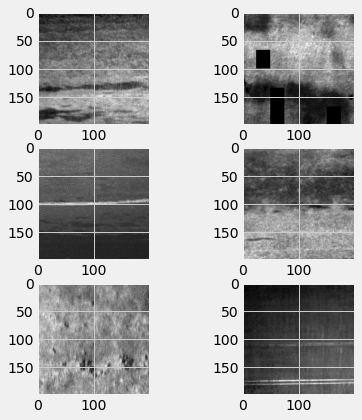

In [ ]:
#plotando algumas imagens aleatórias

for i in range(0, 6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    plt.subplot(3,2,i+1)
    plt.imshow(img.reshape(200, 200), cmap=plt.get_cmap('gray'))
plt.subplots_adjust(top=1.4)
plt.show()

In [ ]:
#escalonando x_train e x_test

x_train = x_train / 255
x_test = x_test / 255

In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from tensorflow.keras.models import * 
from tensorflow.keras.layers import * 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def model_1():
                                    # create model
                                    model = tf.keras.models.Sequential([

                                        # First Convolution
                                        tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(200, 200, 1)),
                                        tf.keras.layers.Conv2D(64, (5,5), activation='relu', padding = 'same'),
                                        tf.keras.layers.MaxPooling2D(2, 2),
                                        tf.keras.layers.Dropout(0.25),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(128, activation='relu'),
                                        tf.keras.layers.Dropout(0.5),
                                        tf.keras.layers.Dense(6, activation='softmax'),
                                        ])

                                    model.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

                                    return(model)

In [ ]:
X2 = np.array(X).reshape((X.shape[0], 200, 200, 1))
#Y2 = np_utils.to_categorical(Y)

In [ ]:
pd.DataFrame(X2[0,:,:,-1])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,205.0,196.0,164.0,160.0,163.0,172.0,194.0,199.0,148.0,151.0,154.0,179.0,164.0,138.0,171.0,157.0,155.0,142.0,129.0,141.0,135.0,162.0,163.0,176.0,192.0,174.0,183.0,181.0,172.0,176.0,199.0,197.0,180.0,198.0,180.0,157.0,170.0,221.0,183.0,167.0,...,218.0,216.0,248.0,255.0,255.0,229.0,213.0,201.0,187.0,203.0,213.0,218.0,248.0,221.0,252.0,251.0,181.0,175.0,178.0,188.0,221.0,238.0,224.0,229.0,222.0,216.0,212.0,242.0,236.0,214.0,212.0,215.0,201.0,191.0,185.0,199.0,193.0,181.0,202.0,221.0
1,170.0,147.0,146.0,178.0,178.0,167.0,194.0,163.0,169.0,162.0,180.0,197.0,141.0,117.0,157.0,179.0,190.0,165.0,167.0,146.0,131.0,168.0,185.0,184.0,162.0,173.0,193.0,178.0,167.0,188.0,190.0,202.0,214.0,202.0,164.0,153.0,182.0,232.0,175.0,169.0,...,184.0,180.0,223.0,254.0,224.0,203.0,228.0,189.0,177.0,236.0,245.0,225.0,207.0,206.0,222.0,213.0,175.0,170.0,183.0,196.0,228.0,240.0,223.0,229.0,219.0,231.0,225.0,233.0,223.0,227.0,204.0,196.0,185.0,176.0,183.0,173.0,207.0,203.0,205.0,190.0
2,161.0,170.0,165.0,176.0,181.0,168.0,174.0,176.0,181.0,191.0,189.0,182.0,138.0,116.0,133.0,134.0,136.0,141.0,163.0,132.0,128.0,155.0,170.0,157.0,153.0,154.0,157.0,153.0,168.0,184.0,217.0,202.0,192.0,231.0,191.0,178.0,184.0,173.0,158.0,169.0,...,185.0,189.0,236.0,255.0,193.0,192.0,198.0,191.0,205.0,245.0,255.0,232.0,231.0,218.0,199.0,200.0,157.0,165.0,195.0,219.0,240.0,255.0,255.0,254.0,230.0,232.0,255.0,255.0,225.0,238.0,201.0,191.0,160.0,150.0,157.0,143.0,184.0,176.0,185.0,215.0
3,168.0,153.0,158.0,174.0,196.0,189.0,193.0,184.0,157.0,160.0,160.0,177.0,117.0,111.0,108.0,126.0,170.0,173.0,155.0,143.0,113.0,153.0,177.0,153.0,129.0,155.0,185.0,164.0,172.0,188.0,192.0,222.0,223.0,229.0,159.0,163.0,157.0,168.0,136.0,167.0,...,196.0,191.0,241.0,239.0,181.0,169.0,170.0,176.0,207.0,255.0,255.0,221.0,200.0,194.0,216.0,174.0,162.0,159.0,171.0,210.0,239.0,255.0,255.0,249.0,217.0,206.0,210.0,248.0,247.0,246.0,207.0,184.0,192.0,182.0,163.0,179.0,199.0,190.0,189.0,183.0
4,154.0,141.0,169.0,170.0,182.0,205.0,178.0,165.0,165.0,155.0,164.0,149.0,116.0,106.0,121.0,123.0,174.0,178.0,175.0,140.0,110.0,136.0,146.0,144.0,130.0,131.0,141.0,167.0,180.0,189.0,194.0,191.0,216.0,197.0,156.0,125.0,147.0,155.0,151.0,168.0,...,178.0,201.0,205.0,174.0,132.0,135.0,163.0,171.0,166.0,206.0,225.0,255.0,195.0,194.0,192.0,173.0,153.0,158.0,183.0,186.0,226.0,247.0,239.0,225.0,234.0,228.0,242.0,241.0,254.0,229.0,206.0,191.0,215.0,214.0,175.0,178.0,190.0,183.0,193.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,137.0,147.0,149.0,146.0,135.0,142.0,139.0,115.0,126.0,129.0,135.0,121.0,107.0,106.0,124.0,129.0,107.0,110.0,103.0,120.0,140.0,141.0,137.0,145.0,144.0,150.0,163.0,124.0,117.0,121.0,144.0,141.0,141.0,141.0,135.0,133.0,139.0,136.0,134.0,131.0,...,109.0,108.0,110.0,116.0,121.0,122.0,136.0,104.0,95.0,112.0,114.0,128.0,124.0,120.0,151.0,156.0,142.0,113.0,99.0,104.0,120.0,112.0,114.0,111.0,114.0,107.0,114.0,142.0,172.0,162.0,167.0,158.0,153.0,136.0,130.0,118.0,136.0,126.0,129.0,139.0
196,130.0,135.0,155.0,129.0,142.0,145.0,139.0,117.0,112.0,107.0,119.0,104.0,119.0,116.0,129.0,108.0,110.0,120.0,105.0,121.0,135.0,153.0,143.0,148.0,148.0,143.0,148.0,113.0,121.0,117.0,144.0,137.0,141.0,135.0,138.0,151.0,171.0,147.0,143.0,137.0,...,134.0,126.0,126.0,127.0,130.0,141.0,120.0,116.0,97.0,122.0,122.0,116.0,109.0,146.0,170.0,165.0,159.0,146.0,136.0,120.0,112.0,114.0,118.0,106.0,133.0,122.0,122.0,128.0,121.0,148.0,175.0,159.0,151.0,145.0,131.0,145.0,133.0,139.0,155.0,

In [ ]:
Y3=[]
for i in range(len(y_train)):
    Y3.append([y_train[i]])
Y3 = pd.DataFrame(Y3)
Y3 = np.array(Y3)
Y3

array([[array([0., 0., 1., 0., 0., 0.], dtype=float32)],
       [array([0., 0., 0., 1., 0., 0.], dtype=float32)],
       [array([0., 0., 0., 0., 0., 1.], dtype=float32)],
       ...,
       [array([0., 0., 0., 1., 0., 0.], dtype=float32)],
       [array([0., 0., 0., 1., 0., 0.], dtype=float32)],
       [array([0., 0., 0., 0., 0., 1.], dtype=float32)]], dtype=object)

In [ ]:
from sklearn.model_selection import StratifiedKFold

learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', patience=3, verbose=-1, factor=0.5, min_lr=0.00001)

seed = 7
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)

cvscores = []

for (train, test) in kfold.split(X2, Y):

                                    X2[test] = X2[test]/255
                                    X2[train] = X2[train]/255
                                    model = model_1()
	                                  
                                    # Fit the model
                                    history = model.fit(X2[train], Y[train], batch_size = 32, epochs=10, verbose=1, steps_per_epoch = 8, callbacks=[learning_rate_reduction])
                                    
                                    history_dict = history.history
                                    acc = history_dict['accuracy']
                                    val_acc = history_dict['val_accuracy']
                                    range_epochs = range(1, len(acc) + 1)

                                    plt.style.use('default')
                                    accuracy_val = plt.plot(range_epochs, val_acc, label='Acurácia no conjunto de validação')
                                    accuracy_train = plt.plot(range_epochs, acc, label='Acurácia no conjunto de treino', color="r")
                                    plt.setp(accuracy_val, linewidth=2.0)
                                    plt.setp(accuracy_train, linewidth=2.0)
                                    plt.xlabel('Épocas') 
                                    plt.ylabel('Acurácia')
                                    plt.legend(loc="lower right")
                                    plt.show()
                                    
                                    # evaluate the model
                                    scores = model.evaluate(X2[test], Y[test], verbose=1)
                                    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
                                    cvscores.append(scores[1] * 100)
                                    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
# reduz o parâmetro de learning rate se não houver melhoras em determinado número de epocas útil para encontrar o mínimo global.

learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                           min_lr=0.00001)
model = model_1()
history = model.fit(x_train, y_train,
                    batch_size = 64,
                    epochs=100,
                    verbose=1,
                    steps_per_epoch = 8,
                    validation_split=0.2,
                    callbacks=[learning_rate_reduction])

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
range_epochs = range(1, len(acc) + 1)

plt.style.use('default')
accuracy_val = plt.plot(range_epochs, val_acc, label='Acurácia no conjunto de validação')
accuracy_train = plt.plot(range_epochs, acc, label='Acurácia no conjunto de treino', color="r")
plt.setp(accuracy_val, linewidth=2.0)
plt.setp(accuracy_train, linewidth=2.0)
plt.xlabel('Épocas') 
plt.ylabel('Acurácia')
plt.legend(loc="lower right")
plt.show()